<a href="https://colab.research.google.com/github/Rushdi-Rzx/Bird-Call-Identification-Using-Deep-Learning/blob/main/Bird_Call_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# # Paths to the folders
# brown_tinamou_path = '/content/drive/MyDrive/Bird/BrownTinamou'
# cinereous_tinamou_path = '/content/drive/MyDrive/Bird/CinereousTinamou'
# great_tinamou_path = '/content/drive/MyDrive/Bird/GreatTinamou'

# #Load and Preprocess Data
# def load_audio_files(folder_path):
#     file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.mp3')]
#     audio_data = []
#     for file_path in tqdm(file_paths, desc=f'Loading {folder_path}'):
#         y, sr = librosa.load(file_path, sr=None)
#         audio_data.append((y, sr))
#     return audio_data

# # Load data for each class
# brown_tinamou_audio = load_audio_files(brown_tinamou_path)
# cinereous_tinamou_audio = load_audio_files(cinereous_tinamou_path)
# great_tinamou_audio = load_audio_files(great_tinamou_path)

# # Combine data and create labels
# audio_data = brown_tinamou_audio + cinereous_tinamou_audio + great_tinamou_audio
# labels = ['Brown Tinamou'] * len(brown_tinamou_audio) + ['Cinereous Tinamou'] * len(cinereous_tinamou_audio) + ['Great Tinamou'] * len(great_tinamou_audio)

# # Plot bar graph for data distribution
# label_counts = {
#     'Brown Tinamou': len(brown_tinamou_audio),
#     'Cinereous Tinamou': len(cinereous_tinamou_audio),
#     'Great Tinamou': len(great_tinamou_audio)
# }

# plt.figure(figsize=(10, 5))
# plt.bar(label_counts.keys(), label_counts.values(), color=['#ff9999','#66b3ff','#99ff99'])
# plt.title('Number of Audio Files per Class')
# plt.xlabel('Bird Species')
# plt.ylabel('Number of Audio Files')
# plt.show()

# # Step 3: Data Augmentation (Example: Time Shifting)
# def augment_audio(y, sr):
#     shift = np.random.randint(low=-5, high=5) * 1000
#     augmented_y = np.roll(y, shift)
#     return augmented_y

# # Step 4: Extract Features (MFCC Example)
# def extract_features(y, sr, n_mfcc=13):
#     mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
#     return mfccs

# # Function to pad MFCC features
# def pad_features(features, max_len):
#     if features.shape[1] < max_len:
#         pad_width = max_len - features.shape[1]
#         features = np.pad(features, pad_width=((0, 0), (0, pad_width)), mode='constant')
#     else:
#         features = features[:, :max_len]
#     return features

# # Define the maximum length for padding
# max_len = 500  # You can adjust this value based on your dataset

# # Prepare dataset with augmented data
# X, y = [], []
# for i, (audio, sr) in enumerate(audio_data):
#     features = extract_features(audio, sr)
#     features = pad_features(features, max_len)
#     X.append(features)
#     y.append(labels[i])
#     # Augment and add more samples
#     for _ in range(2):  # Augment each audio file twice
#         augmented_audio = augment_audio(audio, sr)
#         features = extract_features(augmented_audio, sr)
#         features = pad_features(features, max_len)
#         X.append(features)
#         y.append(labels[i])

# # Convert lists to numpy arrays
# X = np.array(X)
# y = np.array(y)

# # Encode labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Step 5: Split the Dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# # Step 6: Build and Train the Model
# input_shape = (X_train.shape[1], X_train.shape[2], 1)  # Add channel dimension for CNN

# # Define the model
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(len(label_encoder.classes_), activation='softmax')
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Reshape data to fit the model
# X_train = X_train[..., np.newaxis]
# X_test = X_test[..., np.newaxis]

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# # Step 7: Evaluate the Model
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_acc}')

# # Step 8: Save the Model
# model.save('/content/drive/MyDrive/Bird/bird_species_classifier.h5')

# # Convert .mp3 to .wav
# def convert_mp3_to_wav(mp3_path, wav_path):
#     audio = AudioSegment.from_mp3(mp3_path)
#     audio.export(wav_path, format="wav")

# # Step 9: Inference Function
# def predict_bird_species(audio_path):
#     try:
#         y, sr = librosa.load(audio_path, sr=None)
#     except Exception as e:
#         print(f"Error loading {audio_path}: {e}")
#         return None

#     features = extract_features(y, sr)
#     features = pad_features(features, max_len)
#     features = np.expand_dims(features, axis=0)
#     features = features[..., np.newaxis]
#     prediction = model.predict(features)
#     predicted_class = np.argmax(prediction, axis=1)
#     return label_encoder.inverse_transform(predicted_class)[0]



In [88]:
# !pip install pydub
# import os
# import librosa
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tqdm import tqdm
# from pydub import AudioSegment

# # Paths to the folders
# brown_tinamou_path = '/content/drive/MyDrive/Bird/BrownTinamou'
# cinereous_tinamou_path = '/content/drive/MyDrive/Bird/CinereousTinamou'
# great_tinamou_path = '/content/drive/MyDrive/Bird/GreatTinamou'

# # Function to load audio files
# def load_audio_files(folder_path):
#     file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.mp3', '.wav'))]
#     audio_data = []
#     for file_path in tqdm(file_paths, desc=f'Loading {folder_path}'):
#         # Load .wav files directly, convert .mp3 files to .wav before loading
#         if file_path.endswith('.mp3'):
#             audio = AudioSegment.from_mp3(file_path)
#             wav_path = file_path.replace('.mp3', '.wav')
#             audio.export(wav_path, format="wav")
#             y, sr = librosa.load(wav_path, sr=None)
#         else:
#             y, sr = librosa.load(file_path, sr=None)
#         audio_data.append((y, sr))
#     return audio_data

# # Load data for each class
# brown_tinamou_audio = load_audio_files(brown_tinamou_path)
# cinereous_tinamou_audio = load_audio_files(cinereous_tinamou_path)
# great_tinamou_audio = load_audio_files(great_tinamou_path)

# # Combine data and create labels
# audio_data = brown_tinamou_audio + cinereous_tinamou_audio + great_tinamou_audio
# labels = ['Brown Tinamou'] * len(brown_tinamou_audio) + ['Cinereous Tinamou'] * len(cinereous_tinamou_audio) + ['Great Tinamou'] * len(great_tinamou_audio)

# # Plot bar graph for data distribution
# label_counts = {
#     'Brown Tinamou': len(brown_tinamou_audio),
#     'Cinereous Tinamou': len(cinereous_tinamou_audio),
#     'Great Tinamou': len(great_tinamou_audio)
# }

# plt.figure(figsize=(10, 5))
# plt.bar(label_counts.keys(), label_counts.values(), color=['#ff9999','#66b3ff','#99ff99'])
# plt.title('Number of Audio Files per Class')
# plt.xlabel('Bird Species')
# plt.ylabel('Number of Audio Files')
# plt.show()

# # Data Augmentation (Example: Time Shifting)
# def augment_audio(y, sr):
#     shift = np.random.randint(low=-5, high=5) * 1000
#     augmented_y = np.roll(y, shift)
#     return augmented_y

# # Extract Features (MFCC Example)
# def extract_features(y, sr, n_mfcc=13):
#     mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
#     return mfccs

# # Function to pad MFCC features
# def pad_features(features, max_len):
#     if features.shape[1] < max_len:
#         pad_width = max_len - features.shape[1]
#         features = np.pad(features, pad_width=((0, 0), (0, pad_width)), mode='constant')
#     else:
#         features = features[:, :max_len]
#     return features

# # Define the maximum length for padding
# max_len = 500  # You can adjust this value based on your dataset

# # Prepare dataset with augmented data
# X, y = [], []
# for i, (audio, sr) in enumerate(audio_data):
#     features = extract_features(audio, sr)
#     features = pad_features(features, max_len)
#     X.append(features)
#     y.append(labels[i])
#     # Augment and add more samples
#     for _ in range(2):  # Augment each audio file twice
#         augmented_audio = augment_audio(audio, sr)
#         features = extract_features(augmented_audio, sr)
#         features = pad_features(features, max_len)
#         X.append(features)
#         y.append(labels[i])

# # Convert lists to numpy arrays
# X = np.array(X)
# y = np.array(y)

# # Encode labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Split the Dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# # Build and Train the Model
# input_shape = (X_train.shape[1], X_train.shape[2], 1)  # Add channel dimension for CNN

# # Define the model
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(len(label_encoder.classes_), activation='softmax')
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Reshape data to fit the model
# X_train = X_train[..., np.newaxis]
# X_test = X_test[..., np.newaxis]

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# # Evaluate the Model
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_acc}')

# # Save the Model
# model.save('/content/drive/MyDrive/Bird/bird_species_classifier.h5')

# # Plot training & validation accuracy values
# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.tight_layout()
# plt.show()

# # Visualization of a waveform and MFCC features for a sample audio file
# sample_audio, sample_sr = audio_data[0]
# plt.figure(figsize=(14, 5))
# plt.title('Waveform of a Sample Audio')
# librosa.display.waveshow(sample_audio, sr=sample_sr)
# plt.show()

# mfccs = librosa.feature.mfcc(y=sample_audio, sr=sample_sr, n_mfcc=13)
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(mfccs, sr=sample_sr, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()
# plt.show()

# # Convert .mp3 to .wav
# def convert_mp3_to_wav(mp3_path, wav_path):
#     audio = AudioSegment.from_mp3(mp3_path)
#     audio.export(wav_path, format="wav")

# # Inference Function
# def predict_bird_species(audio_path):
#     try:
#         y, sr = librosa.load(audio_path, sr=None)
#     except Exception as e:
#         print(f"Error loading {audio_path}: {e}")
#         return None

#     features = extract_features(y, sr)
#     features = pad_features(features, max_len)
#     features = np.expand_dims(features, axis=0)
#     features = features[..., np.newaxis]
#     prediction = model.predict(features)
#     predicted_class = np.argmax(prediction, axis=1)
#     return label_encoder.inverse_transform(predicted_class)[0]

# # Test the prediction function
# print(predict_bird_species('/content/drive/MyDrive/Bird/BrownTinamou/sample.wav'))


# Load necessary libraries

In [89]:
!pip install pydub

In [90]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from pydub import AudioSegment
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load and Prepocess Data

Paths to the folders

In [91]:
brown_tinamou_path = '/content/drive/MyDrive/Bird/BrownTinamou'
cinereous_tinamou_path = '/content/drive/MyDrive/Bird/CinereousTinamou'
great_tinamou_path = '/content/drive/MyDrive/Bird/GreatTinamou'

Load and Preprocess Data

In [92]:
def load_audio_files(folder_path):
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.mp3')]
    audio_data = []
    for file_path in tqdm(file_paths, desc=f'Loading {folder_path}'):
        y, sr = librosa.load(file_path, sr=None)
        audio_data.append((y, sr))
    return audio_data


Load data for each class

In [93]:
brown_tinamou_audio = load_audio_files(brown_tinamou_path)
cinereous_tinamou_audio = load_audio_files(cinereous_tinamou_path)
great_tinamou_audio = load_audio_files(great_tinamou_path)

Loading /content/drive/MyDrive/Bird/BrownTinamou: 100%|██████████| 40/40 [00:06<00:00,  6.24it/s]
Loading /content/drive/MyDrive/Bird/CinereousTinamou: 100%|██████████| 40/40 [00:10<00:00,  3.98it/s]
Loading /content/drive/MyDrive/Bird/GreatTinamou: 100%|██████████| 40/40 [00:09<00:00,  4.06it/s]


Combine data and create labels

In [94]:
audio_data = brown_tinamou_audio + cinereous_tinamou_audio + great_tinamou_audio
labels = ['Brown Tinamou'] * len(brown_tinamou_audio) + ['Cinereous Tinamou'] * len(cinereous_tinamou_audio) + ['Great Tinamou'] * len(great_tinamou_audio)


Plot bar graph for data distribution

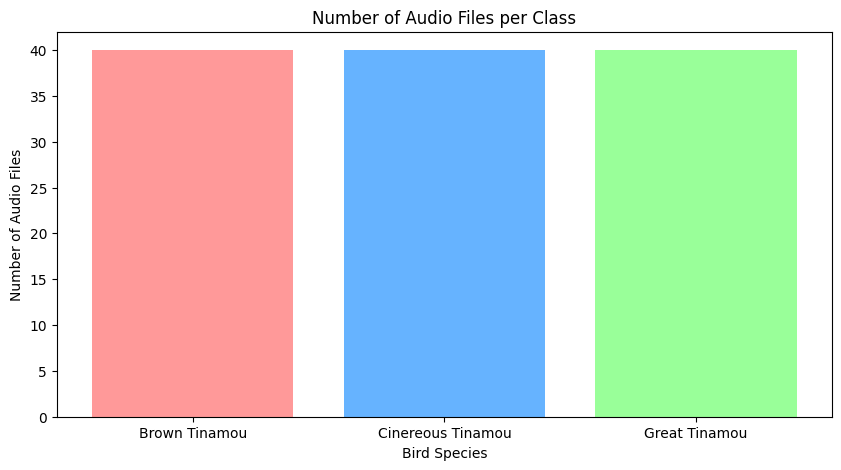

In [95]:
label_counts = {
    'Brown Tinamou': len(brown_tinamou_audio),
    'Cinereous Tinamou': len(cinereous_tinamou_audio),
    'Great Tinamou': len(great_tinamou_audio)
}

plt.figure(figsize=(10, 5))
plt.bar(label_counts.keys(), label_counts.values(), color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Number of Audio Files per Class')
plt.xlabel('Bird Species')
plt.ylabel('Number of Audio Files')
plt.show()


# Data Augmentation

In [96]:
def augment_audio(y, sr):
    shift = np.random.randint(low=-5, high=5) * 1000
    augmented_y = np.roll(y, shift)
    return augmented_y

# Extracting Features (MFCC Example)

In [97]:
def extract_features(y, sr, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs


Function to pad MFCC features

In [98]:
def pad_features(features, max_len):
    if features.shape[1] < max_len:
        pad_width = max_len - features.shape[1]
        features = np.pad(features, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        features = features[:, :max_len]
    return features

Define the maximum length for padding

In [99]:
max_len = 500

Prepare dataset with augmented data


In [100]:
X, y = [], []
for i, (audio, sr) in enumerate(audio_data):
    features = extract_features(audio, sr)
    features = pad_features(features, max_len)
    X.append(features)
    y.append(labels[i])
    # Augment and add more samples
    for _ in range(2):  # Augment each audio file twice
        augmented_audio = augment_audio(audio, sr)
        features = extract_features(augmented_audio, sr)
        features = pad_features(features, max_len)
        X.append(features)
        y.append(labels[i])

Convert lists to numpy arrays

In [101]:
X = np.array(X)
y = np.array(y)

Encode labels

In [102]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the Dataset

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Build and Train the Model

In [104]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)  # Add channel dimension for CNN

Define the model

In [105]:
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(len(label_encoder.classes_), activation='softmax')
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [106]:
from tensorflow.keras import regularizers

# Define the model with dropout and L2 regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # Dropout with 50% rate

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # Dropout with 50% rate

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),  # Dropout with 50% rate
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Reshape data to fit the model

In [107]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

Train the model

In [108]:
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [109]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
9/9 [==============================] - 3s 212ms/step - loss: 123.4173 - accuracy: 0.3125 - val_loss: 9.6366 - val_accuracy: 0.3333
Epoch 2/50
9/9 [==============================] - 2s 176ms/step - loss: 16.4856 - accuracy: 0.4028 - val_loss: 4.2091 - val_accuracy: 0.3472
Epoch 3/50
9/9 [==============================] - 2s 174ms/step - loss: 6.7121 - accuracy: 0.4062 - val_loss: 4.0355 - val_accuracy: 0.2917
Epoch 4/50
9/9 [==============================] - 2s 284ms/step - loss: 4.8121 - accuracy: 0.4306 - val_loss: 4.0416 - val_accuracy: 0.4306
Epoch 5/50
9/9 [==============================] - 3s 334ms/step - loss: 4.2881 - accuracy: 0.4167 - val_loss: 3.9768 - val_accuracy: 0.5000
Epoch 6/50
9/9 [==============================] - 3s 321ms/step - loss: 4.1295 - accuracy: 0.4583 - val_loss: 3.9042 - val_accuracy: 0.5694
Epoch 7/50
9/9 [==============================] - 3s 281ms/step - loss: 4.0057 - accuracy: 0.4271 - val_loss: 3.8446 - val_accuracy: 0.5000
Epoch 8/50
9/9 [=

# Evaluate the Model

In [110]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

3/3 [==============================] - 0s 28ms/step - loss: 2.5934 - accuracy: 0.8611
Test accuracy: 0.8611111044883728


Classification Report

In [111]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Decode the encoded labels back to original class names
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_class)

# Generate the classification report
class_report = classification_report(y_test_decoded, y_pred_decoded)

# Print the classification report
print(class_report)

3/3 [==============================] - 0s 27ms/step
                   precision    recall  f1-score   support

    Brown Tinamou       0.92      0.92      0.92        24
Cinereous Tinamou       0.83      0.83      0.83        24
    Great Tinamou       0.83      0.83      0.83        24

         accuracy                           0.86        72
        macro avg       0.86      0.86      0.86        72
     weighted avg       0.86      0.86      0.86        72



Confusion Matrix

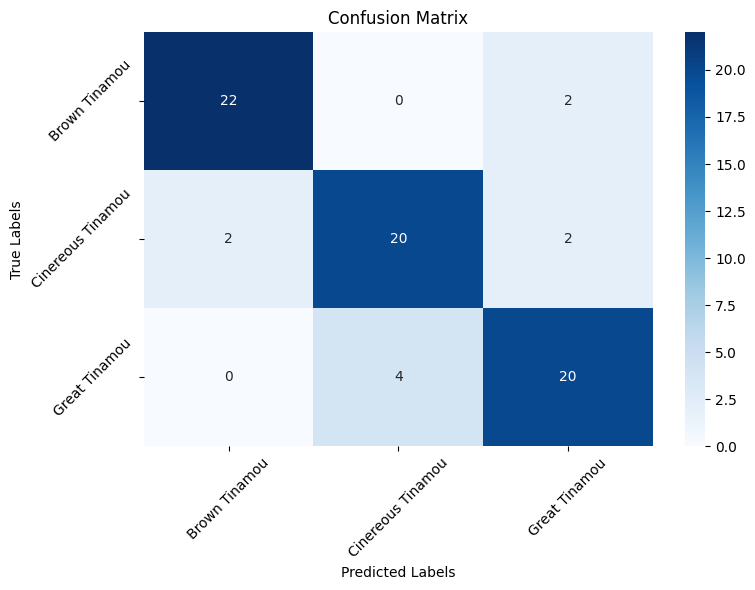

In [112]:
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

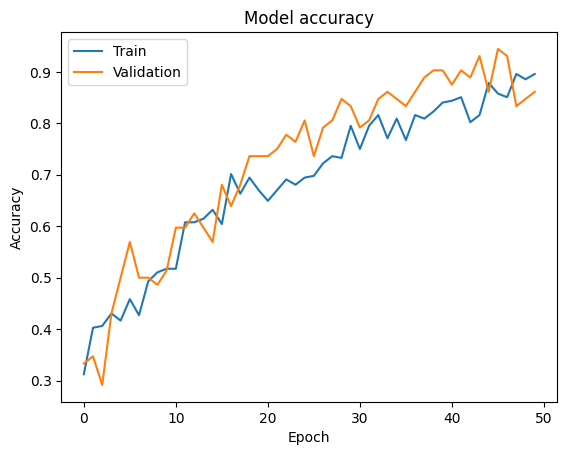

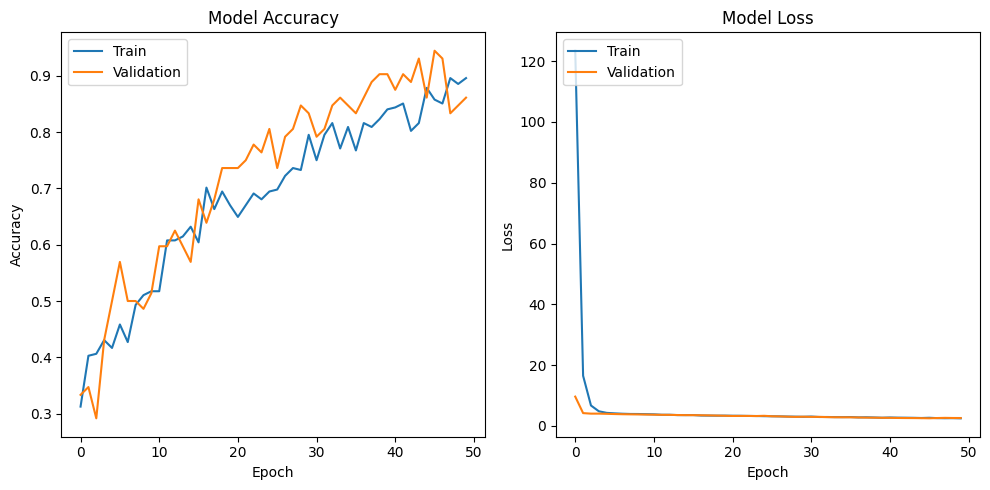

In [113]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Save the Model

In [114]:
model.save('/content/drive/MyDrive/Bird/bird_species_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Convert .mp3 to .wav

In [115]:
def convert_mp3_to_wav(mp3_path, wav_path):
    audio = AudioSegment.from_mp3(mp3_path)
    audio.export(wav_path, format="wav")

Inference Function

In [116]:
def predict_bird_species(audio_path):
    try:
        y, sr = librosa.load(audio_path, sr=None)
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        return None

    features = extract_features(y, sr)
    features = pad_features(features, max_len)
    features = np.expand_dims(features, axis=0)
    features = features[..., np.newaxis]
    prediction = model.predict(features)
    predicted_class = np.argmax(prediction, axis=1)
    return label_encoder.inverse_transform(predicted_class)[0]

Example Usage of Inference Function

In [117]:
# mp3_path = '/content/XC257242 - Cinereous Tinamou - Crypturellus cinereus.mp3'
# # wav_path = '/content/drive/MyDrive/Bird/GreatTinamou/example.wav'
# convert_mp3_to_wav(mp3_path, wav_path)

# predicted_species = predict_bird_species(wav_path)
# if predicted_species:
#     print(f'Predicted bird species: {predicted_species}')
# else:
#     print('Prediction failed due to an error in loading the audio file.')